In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import preprocessing as P
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

## define functions(often use in AI network)
def mse(target_train, target_pred):
    from keras import backend as B
    return B.mean(B.square(target_pred - target_train), axis=-1)
def rmse(target_train, target_pred):
    from keras import backend as B
    return B.sqrt(B.mean(B.square(target_pred - target_train), axis=-1))
def r_square(target_train, target_pred):
    from keras import backend as B
    SS_res =  B.sum(B.square(target_train - target_pred)) 
    SS_tot = B.sum(B.square(target_train - B.mean(target_train))) 
    return (1 - SS_res/(SS_tot + B.epsilon()))
def r_square_loss(target_train, target_pred):
    from keras import backend as B
    SS_res =  B.sum(B.square(target_train - target_pred)) 
    SS_tot = B.sum(B.square(target_train - B.mean(target_train))) 
    return 1 - ( 1 - SS_res/(SS_tot + B.epsilon()))

Using TensorFlow backend.
C:\Users\SMCMLAB-10\Anaconda3\envs\Materials_ML\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SMCMLAB-10\Anaconda3\envs\Materials_ML\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SMCMLAB-10\Anaconda3\envs\Materials_ML\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SM

In [2]:
# initialization
g = 9.8
datanum = 10000
trainnum = int (datanum * 0.9)
testnum = datanum - trainnum
np.random.seed(datanum)
input_data = np.zeros((datanum, 2), dtype = float)
output_data = np.zeros((datanum, 2), dtype = float)
output_pred = np.zeros((testnum, 2), dtype = float)
height = np.zeros((datanum, 1), dtype = float)
distance = np.zeros((datanum, 1), dtype = float)

# preparing dataset
velocity = np.linspace(0, 50, datanum)
angle = np.linspace(0, math.pi, datanum)
np.random.shuffle(velocity)
np.random.shuffle(angle)
for i in range(datanum):
    height[i] = ( velocity[i] * math.sin(angle[i]) )**2 / ( 2 * g )
    distance[i] = velocity[i]**2 * math.sin(2 * angle[i]) / g
input_data = np.hstack((velocity.reshape(-1,1), angle.reshape(-1,1)))
output_data = np.hstack((height, distance))

In [3]:
input_train = P.scale(input_data[:trainnum])
output_train = P.scale(output_data[:trainnum])
input_test = P.scale(input_data[trainnum:])
output_test = P.scale(output_data[trainnum:])

#input_train = input_data[:trainnum]
#output_train = output_data[:trainnum]
#input_test = input_data[trainnum:]
#output_test = output_data[trainnum:]

# building the network
model = Sequential()
model.add(Dense(units = 8, input_dim = 2, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 2))
sgd = optimizers.Adam()

model.compile(loss = 'mean_squared_error', optimizer = sgd, \
              metrics=["accuracy", "mean_squared_error", rmse, r_square])

# training the network above
result = model.fit(input_train, output_train, epochs = 1000, batch_size = 200, \
                   validation_data = (input_test, output_test), verbose = 1)

output_pred = model.predict(input_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 9000 samples, validate on 1000 samples
Epoch 1/1000
9000/9000 [==============================] - 1s 76us/step - loss: 0.9550 - accuracy: 0.5813 - mean_squared_error: 0.9550 - rmse: 0.8095 - r_square: 0.0420 - val_loss: 0.7973 - val_accuracy: 0.8150 - val_mean_squared_error: 0.7973 - val_rmse: 0.7284 - val_r_square: 0.2002
Epoch 2/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.6698 - accuracy: 0.8324 - mean_squared_error: 0.6698 - rmse: 0.6444 - r_square: 0.3274 - val_loss: 0.5529 - val_accuracy: 0.8170 - val_mean_squared_error: 0.5529 - val_rmse: 0.5850 - val_r_square: 0.4455
Epoch 3/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.4458 - accuracy: 0.8354 - mean_squared_error: 0.4458 - rmse: 0.5122 - r_square: 0.5532 - val_loss: 0.3500 - val_accuracy: 0.8770 - val_mean_squared_error: 0.3500 - val_rmse: 0.4511 - 

9000/9000 [==============================] - 0s 5us/step - loss: 0.0086 - accuracy: 0.9749 - mean_squared_error: 0.0086 - rmse: 0.0720 - r_square: 0.9912 - val_loss: 0.0095 - val_accuracy: 0.9750 - val_mean_squared_error: 0.0095 - val_rmse: 0.0790 - val_r_square: 0.9905
Epoch 28/1000
9000/9000 [==============================] - 0s 6us/step - loss: 0.0079 - accuracy: 0.9763 - mean_squared_error: 0.0079 - rmse: 0.0696 - r_square: 0.9920 - val_loss: 0.0080 - val_accuracy: 0.9750 - val_mean_squared_error: 0.0080 - val_rmse: 0.0729 - val_r_square: 0.9920
Epoch 29/1000
9000/9000 [==============================] - 0s 6us/step - loss: 0.0074 - accuracy: 0.9767 - mean_squared_error: 0.0074 - rmse: 0.0675 - r_square: 0.9924 - val_loss: 0.0078 - val_accuracy: 0.9750 - val_mean_squared_error: 0.0078 - val_rmse: 0.0720 - val_r_square: 0.9922
Epoch 30/1000
9000/9000 [==============================] - 0s 6us/step - loss: 0.0070 - accuracy: 0.9792 - mean_squared_error: 0.0070 - rmse: 0.0662 - r_square

Epoch 56/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0024 - accuracy: 0.9907 - mean_squared_error: 0.0024 - rmse: 0.0406 - r_square: 0.9975 - val_loss: 0.0038 - val_accuracy: 0.9860 - val_mean_squared_error: 0.0038 - val_rmse: 0.0517 - val_r_square: 0.9962
Epoch 57/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0023 - accuracy: 0.9901 - mean_squared_error: 0.0023 - rmse: 0.0396 - r_square: 0.9977 - val_loss: 0.0039 - val_accuracy: 0.9870 - val_mean_squared_error: 0.0039 - val_rmse: 0.0522 - val_r_square: 0.9961
Epoch 58/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0023 - accuracy: 0.9903 - mean_squared_error: 0.0023 - rmse: 0.0392 - r_square: 0.9977 - val_loss: 0.0038 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0038 - val_rmse: 0.0507 - val_r_square: 0.9962
Epoch 59/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0022 - accuracy: 0.9902 - mean_squared_error: 0.0022 - rmse: 0.0

Epoch 85/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0016 - accuracy: 0.9921 - mean_squared_error: 0.0016 - rmse: 0.0332 - r_square: 0.9984 - val_loss: 0.0030 - val_accuracy: 0.9870 - val_mean_squared_error: 0.0030 - val_rmse: 0.0457 - val_r_square: 0.9970
Epoch 86/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0016 - accuracy: 0.9920 - mean_squared_error: 0.0016 - rmse: 0.0333 - r_square: 0.9984 - val_loss: 0.0031 - val_accuracy: 0.9880 - val_mean_squared_error: 0.0031 - val_rmse: 0.0458 - val_r_square: 0.9968
Epoch 87/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0015 - accuracy: 0.9919 - mean_squared_error: 0.0015 - rmse: 0.0327 - r_square: 0.9985 - val_loss: 0.0030 - val_accuracy: 0.9870 - val_mean_squared_error: 0.0030 - val_rmse: 0.0457 - val_r_square: 0.9970
Epoch 88/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0015 - accuracy: 0.9922 - mean_squared_error: 0.0015 - rmse: 0.0

Epoch 114/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0013 - accuracy: 0.9927 - mean_squared_error: 0.0013 - rmse: 0.0306 - r_square: 0.9987 - val_loss: 0.0026 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0026 - val_rmse: 0.0420 - val_r_square: 0.9974
Epoch 115/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0013 - accuracy: 0.9924 - mean_squared_error: 0.0013 - rmse: 0.0308 - r_square: 0.9986 - val_loss: 0.0027 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0027 - val_rmse: 0.0428 - val_r_square: 0.9973
Epoch 116/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0013 - accuracy: 0.9924 - mean_squared_error: 0.0013 - rmse: 0.0304 - r_square: 0.9987 - val_loss: 0.0027 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0027 - val_rmse: 0.0424 - val_r_square: 0.9973
Epoch 117/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0013 - accuracy: 0.9930 - mean_squared_error: 0.0013 - rmse:

Epoch 143/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0011 - accuracy: 0.9929 - mean_squared_error: 0.0011 - rmse: 0.0285 - r_square: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0026 - val_rmse: 0.0419 - val_r_square: 0.9974
Epoch 144/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0011 - accuracy: 0.9927 - mean_squared_error: 0.0011 - rmse: 0.0278 - r_square: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0029 - val_rmse: 0.0429 - val_r_square: 0.9970
Epoch 145/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0011 - accuracy: 0.9928 - mean_squared_error: 0.0011 - rmse: 0.0278 - r_square: 0.9989 - val_loss: 0.0025 - val_accuracy: 0.9880 - val_mean_squared_error: 0.0025 - val_rmse: 0.0419 - val_r_square: 0.9974
Epoch 146/1000
9000/9000 [==============================] - 0s 5us/step - loss: 0.0011 - accuracy: 0.9922 - mean_squared_error: 0.0011 - rmse:

Epoch 172/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.9939e-04 - accuracy: 0.9930 - mean_squared_error: 9.9939e-04 - rmse: 0.0268 - r_square: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9880 - val_mean_squared_error: 0.0022 - val_rmse: 0.0402 - val_r_square: 0.9978
Epoch 173/1000
9000/9000 [==============================] - 0s 6us/step - loss: 9.9383e-04 - accuracy: 0.9927 - mean_squared_error: 9.9383e-04 - rmse: 0.0268 - r_square: 0.9990 - val_loss: 0.0024 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0024 - val_rmse: 0.0412 - val_r_square: 0.9976
Epoch 174/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.7993e-04 - accuracy: 0.9927 - mean_squared_error: 9.7993e-04 - rmse: 0.0267 - r_square: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0023 - val_rmse: 0.0395 - val_r_square: 0.9977
Epoch 175/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.9230e-04 - accuracy: 0.9931 - mean_s

9000/9000 [==============================] - 0s 5us/step - loss: 9.2525e-04 - accuracy: 0.9937 - mean_squared_error: 9.2525e-04 - rmse: 0.0259 - r_square: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0026 - val_rmse: 0.0423 - val_r_square: 0.9974
Epoch 201/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.8015e-04 - accuracy: 0.9936 - mean_squared_error: 9.8015e-04 - rmse: 0.0268 - r_square: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0023 - val_rmse: 0.0401 - val_r_square: 0.9977
Epoch 202/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.1862e-04 - accuracy: 0.9929 - mean_squared_error: 9.1862e-04 - rmse: 0.0259 - r_square: 0.9991 - val_loss: 0.0020 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0020 - val_rmse: 0.0391 - val_r_square: 0.9980
Epoch 203/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.3659e-04 - accuracy: 0.9939 - mean_squared_error: 9

Epoch 228/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.0184e-04 - accuracy: 0.9940 - mean_squared_error: 9.0184e-04 - rmse: 0.0258 - r_square: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0406 - val_r_square: 0.9978
Epoch 229/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.8895e-04 - accuracy: 0.9941 - mean_squared_error: 8.8895e-04 - rmse: 0.0256 - r_square: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9930 - val_mean_squared_error: 0.0022 - val_rmse: 0.0400 - val_r_square: 0.9977
Epoch 230/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.7451e-04 - accuracy: 0.9940 - mean_squared_error: 8.7451e-04 - rmse: 0.0254 - r_square: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0024 - val_rmse: 0.0407 - val_r_square: 0.9976
Epoch 231/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.7072e-04 - accuracy: 0.9940 - mean_s

Epoch 256/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.7147e-04 - accuracy: 0.9947 - mean_squared_error: 8.7147e-04 - rmse: 0.0254 - r_square: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0025 - val_rmse: 0.0416 - val_r_square: 0.9975
Epoch 257/1000
9000/9000 [==============================] - 0s 5us/step - loss: 9.3465e-04 - accuracy: 0.9948 - mean_squared_error: 9.3465e-04 - rmse: 0.0263 - r_square: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0395 - val_r_square: 0.9978
Epoch 258/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.6870e-04 - accuracy: 0.9941 - mean_squared_error: 8.6870e-04 - rmse: 0.0253 - r_square: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0023 - val_rmse: 0.0406 - val_r_square: 0.9976
Epoch 259/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.4738e-04 - accuracy: 0.9949 - mean_s

Epoch 284/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.1516e-04 - accuracy: 0.9950 - mean_squared_error: 8.1516e-04 - rmse: 0.0246 - r_square: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0023 - val_rmse: 0.0393 - val_r_square: 0.9977
Epoch 285/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.0281e-04 - accuracy: 0.9943 - mean_squared_error: 8.0281e-04 - rmse: 0.0244 - r_square: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9950 - val_mean_squared_error: 0.0025 - val_rmse: 0.0424 - val_r_square: 0.9974
Epoch 286/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.2047e-04 - accuracy: 0.9949 - mean_squared_error: 8.2047e-04 - rmse: 0.0247 - r_square: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9930 - val_mean_squared_error: 0.0025 - val_rmse: 0.0419 - val_r_square: 0.9975
Epoch 287/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.2526e-04 - accuracy: 0.9944 - mean_s

Epoch 312/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.8602e-04 - accuracy: 0.9943 - mean_squared_error: 7.8602e-04 - rmse: 0.0242 - r_square: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0025 - val_rmse: 0.0414 - val_r_square: 0.9975
Epoch 313/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.9445e-04 - accuracy: 0.9947 - mean_squared_error: 7.9444e-04 - rmse: 0.0243 - r_square: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9950 - val_mean_squared_error: 0.0025 - val_rmse: 0.0405 - val_r_square: 0.9975
Epoch 314/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.8916e-04 - accuracy: 0.9953 - mean_squared_error: 7.8916e-04 - rmse: 0.0242 - r_square: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0024 - val_rmse: 0.0408 - val_r_square: 0.9976
Epoch 315/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.8834e-04 - accuracy: 0.9949 - mean_s

Epoch 340/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.7602e-04 - accuracy: 0.9948 - mean_squared_error: 7.7602e-04 - rmse: 0.0241 - r_square: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0392 - val_r_square: 0.9978
Epoch 341/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.8023e-04 - accuracy: 0.9950 - mean_squared_error: 7.8023e-04 - rmse: 0.0240 - r_square: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0387 - val_r_square: 0.9979
Epoch 342/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.7251e-04 - accuracy: 0.9949 - mean_squared_error: 7.7251e-04 - rmse: 0.0239 - r_square: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0023 - val_rmse: 0.0415 - val_r_square: 0.9977
Epoch 343/1000
9000/9000 [==============================] - 0s 6us/step - loss: 7.7170e-04 - accuracy: 0.9943 - mean_s

Epoch 368/1000
9000/9000 [==============================] - 0s 5us/step - loss: 8.1507e-04 - accuracy: 0.9940 - mean_squared_error: 8.1507e-04 - rmse: 0.0245 - r_square: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0023 - val_rmse: 0.0404 - val_r_square: 0.9977
Epoch 369/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.6286e-04 - accuracy: 0.9944 - mean_squared_error: 7.6286e-04 - rmse: 0.0239 - r_square: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9940 - val_mean_squared_error: 0.0022 - val_rmse: 0.0386 - val_r_square: 0.9978
Epoch 370/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.5184e-04 - accuracy: 0.9948 - mean_squared_error: 7.5184e-04 - rmse: 0.0236 - r_square: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0023 - val_rmse: 0.0395 - val_r_square: 0.9977
Epoch 371/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.7963e-04 - accuracy: 0.9952 - mean_s

Epoch 396/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.2914e-04 - accuracy: 0.9946 - mean_squared_error: 7.2914e-04 - rmse: 0.0232 - r_square: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0027 - val_rmse: 0.0434 - val_r_square: 0.9973
Epoch 397/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.1807e-04 - accuracy: 0.9946 - mean_squared_error: 7.1807e-04 - rmse: 0.0231 - r_square: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0024 - val_rmse: 0.0408 - val_r_square: 0.9976
Epoch 398/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.5845e-04 - accuracy: 0.9940 - mean_squared_error: 7.5845e-04 - rmse: 0.0238 - r_square: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0024 - val_rmse: 0.0405 - val_r_square: 0.9976
Epoch 399/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.2888e-04 - accuracy: 0.9948 - mean_s

Epoch 424/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.0606e-04 - accuracy: 0.9946 - mean_squared_error: 7.0606e-04 - rmse: 0.0229 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0400 - val_r_square: 0.9978
Epoch 425/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.0826e-04 - accuracy: 0.9944 - mean_squared_error: 7.0826e-04 - rmse: 0.0229 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0022 - val_rmse: 0.0392 - val_r_square: 0.9978
Epoch 426/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.1163e-04 - accuracy: 0.9948 - mean_squared_error: 7.1163e-04 - rmse: 0.0229 - r_square: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0023 - val_rmse: 0.0403 - val_r_square: 0.9977
Epoch 427/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.3656e-04 - accuracy: 0.9939 - mean_s

Epoch 452/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.7978e-04 - accuracy: 0.9948 - mean_squared_error: 6.7978e-04 - rmse: 0.0224 - r_square: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0410 - val_r_square: 0.9977
Epoch 453/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.0833e-04 - accuracy: 0.9941 - mean_squared_error: 7.0833e-04 - rmse: 0.0230 - r_square: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0024 - val_rmse: 0.0411 - val_r_square: 0.9976
Epoch 454/1000
9000/9000 [==============================] - 0s 6us/step - loss: 7.3660e-04 - accuracy: 0.9946 - mean_squared_error: 7.3660e-04 - rmse: 0.0234 - r_square: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0027 - val_rmse: 0.0418 - val_r_square: 0.9973
Epoch 455/1000
9000/9000 [==============================] - 0s 6us/step - loss: 6.9883e-04 - accuracy: 0.9942 - mean_s

Epoch 480/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.8193e-04 - accuracy: 0.9939 - mean_squared_error: 6.8193e-04 - rmse: 0.0225 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0022 - val_rmse: 0.0376 - val_r_square: 0.9978
Epoch 481/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.7424e-04 - accuracy: 0.9941 - mean_squared_error: 6.7424e-04 - rmse: 0.0223 - r_square: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0023 - val_rmse: 0.0390 - val_r_square: 0.9976
Epoch 482/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.2745e-04 - accuracy: 0.9939 - mean_squared_error: 7.2745e-04 - rmse: 0.0232 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0022 - val_rmse: 0.0395 - val_r_square: 0.9978
Epoch 483/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.7446e-04 - accuracy: 0.9943 - mean_s

Epoch 508/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.1265e-04 - accuracy: 0.9946 - mean_squared_error: 7.1265e-04 - rmse: 0.0228 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9930 - val_mean_squared_error: 0.0022 - val_rmse: 0.0384 - val_r_square: 0.9978
Epoch 509/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.8557e-04 - accuracy: 0.9946 - mean_squared_error: 6.8557e-04 - rmse: 0.0223 - r_square: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0029 - val_rmse: 0.0421 - val_r_square: 0.9971
Epoch 510/1000
9000/9000 [==============================] - 0s 5us/step - loss: 7.1882e-04 - accuracy: 0.9946 - mean_squared_error: 7.1882e-04 - rmse: 0.0229 - r_square: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0023 - val_rmse: 0.0394 - val_r_square: 0.9977
Epoch 511/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.8658e-04 - accuracy: 0.9937 - mean_s

Epoch 536/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.4288e-04 - accuracy: 0.9944 - mean_squared_error: 6.4288e-04 - rmse: 0.0217 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0375 - val_r_square: 0.9979
Epoch 537/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.5847e-04 - accuracy: 0.9946 - mean_squared_error: 6.5847e-04 - rmse: 0.0220 - r_square: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0400 - val_r_square: 0.9977
Epoch 538/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.5531e-04 - accuracy: 0.9937 - mean_squared_error: 6.5531e-04 - rmse: 0.0219 - r_square: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0367 - val_r_square: 0.9980
Epoch 539/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.4112e-04 - accuracy: 0.9942 - mean_s

Epoch 564/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.3228e-04 - accuracy: 0.9943 - mean_squared_error: 6.3228e-04 - rmse: 0.0216 - r_square: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0022 - val_rmse: 0.0388 - val_r_square: 0.9978
Epoch 565/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.3849e-04 - accuracy: 0.9946 - mean_squared_error: 6.3849e-04 - rmse: 0.0215 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0378 - val_r_square: 0.9979
Epoch 566/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.3210e-04 - accuracy: 0.9943 - mean_squared_error: 6.3210e-04 - rmse: 0.0215 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0373 - val_r_square: 0.9980
Epoch 567/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.5979e-04 - accuracy: 0.9944 - mean_s

Epoch 592/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1819e-04 - accuracy: 0.9939 - mean_squared_error: 6.1819e-04 - rmse: 0.0212 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0019 - val_rmse: 0.0365 - val_r_square: 0.9980
Epoch 593/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.5076e-04 - accuracy: 0.9941 - mean_squared_error: 6.5076e-04 - rmse: 0.0218 - r_square: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0382 - val_r_square: 0.9980
Epoch 594/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.2896e-04 - accuracy: 0.9943 - mean_squared_error: 6.2896e-04 - rmse: 0.0214 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0402 - val_r_square: 0.9976
Epoch 595/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1765e-04 - accuracy: 0.9944 - mean_s

Epoch 620/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.2917e-04 - accuracy: 0.9937 - mean_squared_error: 6.2917e-04 - rmse: 0.0215 - r_square: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0394 - val_r_square: 0.9978
Epoch 621/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1598e-04 - accuracy: 0.9942 - mean_squared_error: 6.1598e-04 - rmse: 0.0212 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0021 - val_rmse: 0.0382 - val_r_square: 0.9979
Epoch 622/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.2137e-04 - accuracy: 0.9938 - mean_squared_error: 6.2137e-04 - rmse: 0.0212 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0019 - val_rmse: 0.0373 - val_r_square: 0.9981
Epoch 623/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1790e-04 - accuracy: 0.9939 - mean_s

Epoch 648/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.4801e-04 - accuracy: 0.9946 - mean_squared_error: 6.4801e-04 - rmse: 0.0218 - r_square: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0386 - val_r_square: 0.9979
Epoch 649/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.0264e-04 - accuracy: 0.9944 - mean_squared_error: 6.0264e-04 - rmse: 0.0209 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0020 - val_rmse: 0.0371 - val_r_square: 0.9980
Epoch 650/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.9102e-04 - accuracy: 0.9941 - mean_squared_error: 5.9102e-04 - rmse: 0.0208 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0375 - val_r_square: 0.9978
Epoch 651/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.7578e-04 - accuracy: 0.9941 - mean_s

Epoch 676/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.9024e-04 - accuracy: 0.9942 - mean_squared_error: 5.9024e-04 - rmse: 0.0207 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0387 - val_r_square: 0.9977
Epoch 677/1000
9000/9000 [==============================] - 0s 6us/step - loss: 5.9354e-04 - accuracy: 0.9939 - mean_squared_error: 5.9354e-04 - rmse: 0.0208 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0019 - val_rmse: 0.0367 - val_r_square: 0.9981
Epoch 678/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1053e-04 - accuracy: 0.9941 - mean_squared_error: 6.1053e-04 - rmse: 0.0211 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9890 - val_mean_squared_error: 0.0021 - val_rmse: 0.0384 - val_r_square: 0.9979
Epoch 679/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.2123e-04 - accuracy: 0.9940 - mean_s

Epoch 704/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.8707e-04 - accuracy: 0.9943 - mean_squared_error: 5.8707e-04 - rmse: 0.0207 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0379 - val_r_square: 0.9978
Epoch 705/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.0227e-04 - accuracy: 0.9946 - mean_squared_error: 6.0227e-04 - rmse: 0.0209 - r_square: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0022 - val_rmse: 0.0397 - val_r_square: 0.9978
Epoch 706/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.0095e-04 - accuracy: 0.9943 - mean_squared_error: 6.0095e-04 - rmse: 0.0209 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0375 - val_r_square: 0.9979
Epoch 707/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.9524e-04 - accuracy: 0.9948 - mean_s

Epoch 732/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.4947e-04 - accuracy: 0.9944 - mean_squared_error: 6.4947e-04 - rmse: 0.0218 - r_square: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0383 - val_r_square: 0.9978
Epoch 733/1000
9000/9000 [==============================] - 0s 6us/step - loss: 5.9109e-04 - accuracy: 0.9939 - mean_squared_error: 5.9109e-04 - rmse: 0.0207 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0384 - val_r_square: 0.9978
Epoch 734/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.1320e-04 - accuracy: 0.9940 - mean_squared_error: 6.1320e-04 - rmse: 0.0210 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0378 - val_r_square: 0.9979
Epoch 735/1000
9000/9000 [==============================] - 0s 6us/step - loss: 5.6238e-04 - accuracy: 0.9947 - mean_s

Epoch 760/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7202e-04 - accuracy: 0.9944 - mean_squared_error: 5.7202e-04 - rmse: 0.0203 - r_square: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0022 - val_rmse: 0.0398 - val_r_square: 0.9978
Epoch 761/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7914e-04 - accuracy: 0.9947 - mean_squared_error: 5.7914e-04 - rmse: 0.0204 - r_square: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0022 - val_rmse: 0.0373 - val_r_square: 0.9978
Epoch 762/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7197e-04 - accuracy: 0.9948 - mean_squared_error: 5.7197e-04 - rmse: 0.0203 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0383 - val_r_square: 0.9977
Epoch 763/1000
9000/9000 [==============================] - 0s 5us/step - loss: 6.2490e-04 - accuracy: 0.9940 - mean_s

Epoch 788/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7844e-04 - accuracy: 0.9944 - mean_squared_error: 5.7844e-04 - rmse: 0.0204 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0023 - val_rmse: 0.0378 - val_r_square: 0.9977
Epoch 789/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.9584e-04 - accuracy: 0.9944 - mean_squared_error: 5.9584e-04 - rmse: 0.0208 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0019 - val_rmse: 0.0355 - val_r_square: 0.9981
Epoch 790/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7912e-04 - accuracy: 0.9942 - mean_squared_error: 5.7912e-04 - rmse: 0.0203 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0393 - val_r_square: 0.9977
Epoch 791/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4092e-04 - accuracy: 0.9943 - mean_s

Epoch 816/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.6200e-04 - accuracy: 0.9942 - mean_squared_error: 5.6200e-04 - rmse: 0.0201 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0374 - val_r_square: 0.9979
Epoch 817/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.8472e-04 - accuracy: 0.9943 - mean_squared_error: 5.8472e-04 - rmse: 0.0204 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0371 - val_r_square: 0.9980
Epoch 818/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4772e-04 - accuracy: 0.9941 - mean_squared_error: 5.4772e-04 - rmse: 0.0198 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0020 - val_rmse: 0.0372 - val_r_square: 0.9980
Epoch 819/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.5329e-04 - accuracy: 0.9941 - mean_s

Epoch 844/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4863e-04 - accuracy: 0.9946 - mean_squared_error: 5.4863e-04 - rmse: 0.0199 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0020 - val_rmse: 0.0376 - val_r_square: 0.9980
Epoch 845/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.5302e-04 - accuracy: 0.9954 - mean_squared_error: 5.5302e-04 - rmse: 0.0199 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9920 - val_mean_squared_error: 0.0020 - val_rmse: 0.0381 - val_r_square: 0.9979
Epoch 846/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.6090e-04 - accuracy: 0.9944 - mean_squared_error: 5.6090e-04 - rmse: 0.0200 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0020 - val_rmse: 0.0363 - val_r_square: 0.9980
Epoch 847/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.6123e-04 - accuracy: 0.9946 - mean_s

Epoch 872/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.3609e-04 - accuracy: 0.9947 - mean_squared_error: 5.3609e-04 - rmse: 0.0197 - r_square: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0020 - val_rmse: 0.0378 - val_r_square: 0.9980
Epoch 873/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4605e-04 - accuracy: 0.9946 - mean_squared_error: 5.4605e-04 - rmse: 0.0198 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0382 - val_r_square: 0.9979
Epoch 874/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4640e-04 - accuracy: 0.9950 - mean_squared_error: 5.4640e-04 - rmse: 0.0199 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0383 - val_r_square: 0.9979
Epoch 875/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.8859e-04 - accuracy: 0.9944 - mean_s

Epoch 900/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.3828e-04 - accuracy: 0.9942 - mean_squared_error: 5.3828e-04 - rmse: 0.0197 - r_square: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0019 - val_rmse: 0.0357 - val_r_square: 0.9981
Epoch 901/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.5947e-04 - accuracy: 0.9947 - mean_squared_error: 5.5947e-04 - rmse: 0.0201 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0400 - val_r_square: 0.9977
Epoch 902/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7367e-04 - accuracy: 0.9943 - mean_squared_error: 5.7367e-04 - rmse: 0.0203 - r_square: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0021 - val_rmse: 0.0373 - val_r_square: 0.9979
Epoch 903/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.6043e-04 - accuracy: 0.9946 - mean_s

Epoch 928/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.5767e-04 - accuracy: 0.9950 - mean_squared_error: 5.5767e-04 - rmse: 0.0200 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0019 - val_rmse: 0.0355 - val_r_square: 0.9981
Epoch 929/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4917e-04 - accuracy: 0.9944 - mean_squared_error: 5.4917e-04 - rmse: 0.0199 - r_square: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0019 - val_rmse: 0.0356 - val_r_square: 0.9981
Epoch 930/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7136e-04 - accuracy: 0.9946 - mean_squared_error: 5.7136e-04 - rmse: 0.0202 - r_square: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0020 - val_rmse: 0.0370 - val_r_square: 0.9980
Epoch 931/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.1921e-04 - accuracy: 0.9951 - mean_s

Epoch 956/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.3070e-04 - accuracy: 0.9946 - mean_squared_error: 5.3070e-04 - rmse: 0.0196 - r_square: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0021 - val_rmse: 0.0378 - val_r_square: 0.9978
Epoch 957/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.2475e-04 - accuracy: 0.9943 - mean_squared_error: 5.2475e-04 - rmse: 0.0193 - r_square: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9910 - val_mean_squared_error: 0.0022 - val_rmse: 0.0383 - val_r_square: 0.9978
Epoch 958/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.2063e-04 - accuracy: 0.9948 - mean_squared_error: 5.2063e-04 - rmse: 0.0194 - r_square: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0402 - val_r_square: 0.9977
Epoch 959/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.7012e-04 - accuracy: 0.9947 - mean_s

Epoch 984/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.2204e-04 - accuracy: 0.9944 - mean_squared_error: 5.2204e-04 - rmse: 0.0193 - r_square: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0022 - val_rmse: 0.0383 - val_r_square: 0.9978
Epoch 985/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.3052e-04 - accuracy: 0.9953 - mean_squared_error: 5.3052e-04 - rmse: 0.0195 - r_square: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0022 - val_rmse: 0.0389 - val_r_square: 0.9978
Epoch 986/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.4348e-04 - accuracy: 0.9951 - mean_squared_error: 5.4348e-04 - rmse: 0.0197 - r_square: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9900 - val_mean_squared_error: 0.0023 - val_rmse: 0.0393 - val_r_square: 0.9977
Epoch 987/1000
9000/9000 [==============================] - 0s 5us/step - loss: 5.6722e-04 - accuracy: 0.9946 - mean_s

In [4]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 594
Trainable params: 594
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
## calculate results
n_list = list(range(1, testnum+1))
h = output_test[:, 0]
h_pre = output_pred[:, 0]
d = output_test[:, 1]
d_pre = output_pred[:, 1]
h_r = (r2_score(h, h_pre))**0.5
h_loss = MSE(h_pre, h)
d_r = (r2_score(d, d_pre))**0.5
d_loss = MSE(d_pre, d)

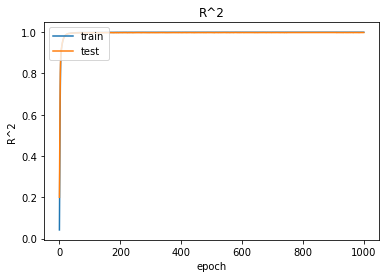

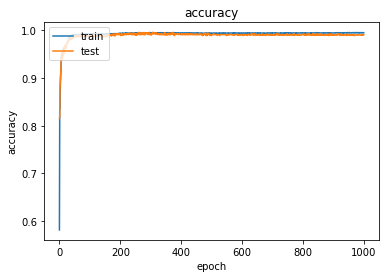

In [6]:
## plot training curves & results
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

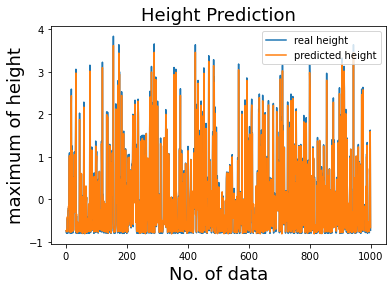

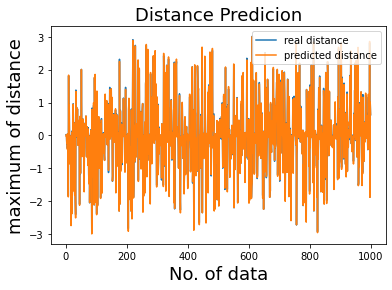

In [7]:
plt.plot(n_list, h, label = 'real height')
plt.plot(n_list, h_pre, label = 'predicted height')
plt.xlabel('No. of data', fontsize = 18)
plt.ylabel('maximum of height', fontsize = 18)
plt.title('Height Prediction', color='black', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

plt.plot(n_list, d, label = 'real distance')
plt.plot(n_list, d_pre, label = 'predicted distance')
plt.xlabel('No. of data', fontsize = 18)
plt.ylabel('maximum of distance', fontsize = 18)
plt.title('Distance Predicion', color='black', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

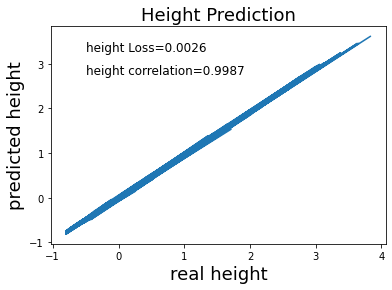

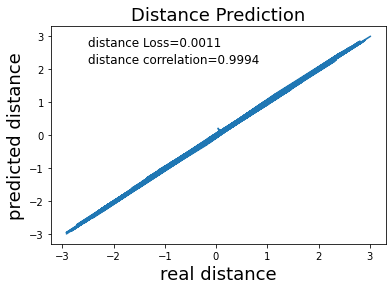

In [8]:
plt.plot(h, h_pre)
plt.xlabel('real height', fontsize = 18)
plt.ylabel('predicted height', fontsize = 18)
plt.title('Height Prediction', color='black', fontsize = 18)
plt.text(-0.5, 3.5, 'height Loss=%.4f' % h_loss,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
plt.text(-0.5, 3, 'height correlation=%.4f' % h_r,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
plt.show()

plt.plot(d, d_pre)
plt.xlabel('real distance', fontsize = 18)
plt.ylabel('predicted distance', fontsize = 18)
plt.title('Distance Prediction', color='black', fontsize = 18)
plt.text(-2.5, 3, 'distance Loss=%.4f' % d_loss,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
plt.text(-2.5, 2.5, 'distance correlation=%.4f' % d_r,verticalalignment = 'top',horizontalalignment = 'left', fontdict={'size': 12, 'color':  'black'})
plt.show()